In [1]:
!pip install TensorFlow
!pip install Keras
!pip install pillow
!pip install NumPy

In [2]:
import os 
import pickle 
import numpy as np 
from tqdm.notebook import tqdm 


from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Dropout,add


In [3]:
BASE_DIR = r"D:\Flickr8k_Dataset"
directory = os.path.join(BASE_DIR, "Flicker8k_Dataset")  # contains the .jpg images


In [4]:
model =VGG16()
model=Model(inputs=model.inputs,outputs=model.layers[-2].output)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.models import Model

# Load VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

# Correct image directory
directory = r"D:\Flickr8k_Dataset\Flicker8k_Dataset"

features = {}

for img_name in tqdm(os.listdir(directory)):
    if not img_name.lower().endswith('.jpg'):
        continue
    
    img_path = os.path.join(directory, img_name)
    
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, 224, 224, 3))
    image = preprocess_input(image)

    feature = model.predict(image, verbose=0)
    image_id = os.path.splitext(img_name)[0]
    features[image_id] = feature


100%|██████████████████████████████████████████████████████████████████████████████| 8099/8099 [24:23<00:00,  5.53it/s]


In [6]:
# stored features in pickle 
pickle.dump(features,open(os.path.join(directory ,'features.pkl'),'wb'))


In [7]:
# load feature from pickle 
with open(os.path.join(directory,'features.pkl'),'rb') as f:
    features=pickle.load(f)

In [8]:

with open(os.path.join('captions.txt'),'r') as f:
    next(f)
    captions_doc=f.read()

In [9]:
mapping={}
#processes lines 
for line in tqdm(captions_doc.split('\n')):
    #split the line
    tokens=line.split(',')
    if len(line)<2:
        continue
    image_id,caption=tokens[0],tokens[1:]
    # remove extension from image id 
    image_id=image_id.split('.')[0]
    #convert caption list to string 
    caption=' '.join(caption)
    if image_id not in mapping:
        mapping[image_id]=[]

    mapping[image_id].append(caption)
    


100%|████████████████████████████████████████████████████████████████████████| 40456/40456 [00:00<00:00, 801780.25it/s]


In [10]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [32]:
import string

def clean(mapping):
    table = str.maketrans('', '', string.punctuation)  # only remove punctuation

    for key, captions in mapping.items():
        cleaned_captions = []
        for caption in captions:
            caption = caption.lower()
            caption = caption.translate(table)
            caption = caption.split()
            caption = [word for word in caption if len(word) > 1 and word.isalpha()]
            cleaned_caption = 'startseq ' + ' '.join(caption) + ' endseq'
            cleaned_captions.append(cleaned_caption)
        mapping[key] = cleaned_captions


In [34]:
clean(mapping)


In [36]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [38]:
all_captions=[]
for key in mapping :
  for caption in mapping[key]:
    all_captions.append(caption)
    

In [40]:
len(all_captions)

40455

In [42]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tricolored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [44]:
# tokenize the text 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size=len(tokenizer.word_index)+1

In [46]:
vocab_size

8766

In [48]:
#get maximum lenght of caption available
max_length=max(len(caption.split()) for caption in all_captions)
max_length

34

In [50]:
image_ids =list(mapping.keys())
split = int(len(image_ids)*0.90)
train=image_ids[:split]
test=image_ids[split:]

In [52]:
from re import X
# create data generator to get data in batch (avoid session crash)
def data_generator(data_keys,mapping,features,tokenizer,max_length,vocab_size,batch_size):
  # loop over images
  X1,X2,y=list(),list(),list()
  n=0
  while 1:
    for key in data_keys:
      n+=1
      captions = mapping[key]
      for caption in captions:
        #encode the sequence
        seq=tokenizer.texts_to_sequences([caption])[0]
        #split the sequence into X,y pairs
        for i in range(1,len(seq)):
          #split into input and output pairs
          in_seq,out_seq=seq[:i],seq[i]
          #pad input sequence
          in_seq=pad_sequences([in_seq],maxlen=max_length)[0]
          #encode output sequence
          out_seq=to_categorical([out_seq],num_classes=vocab_size)[0]

          # store the sequence 
          X1.append(features[key][0])
          X2.append(in_seq)
          y.append(out_seq)

        if n== batch_size:
          X1,X2,y = np.array(X1),np.array(X2),np.array(y)
          yield ( (np.array(X1), np.array(X2)), np.array(y) )
          X1,X2,y=list(),list(),list()
          n=0




In [54]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, LSTM, Add
from tensorflow.keras.models import Model

# Input 1: Image feature vector (e.g., from VGG16 or InceptionV3)
image_input = Input(shape=(4096,), name="Image_Features")
x1 = Dropout(0.4)(image_input)
x1 = Dense(256, activation='relu')(x1)

# Input 2: Sequence of word indices
text_input = Input(shape=(max_length,), name="Text_Sequence")
x2 = Embedding(vocab_size, 256, mask_zero=True)(text_input)
x2 = Dropout(0.4)(x2)
x2 = LSTM(256)(x2)

# Decoder: Combine image and text features
decoder = Add()([x1, x2])
decoder = Dense(256, activation='relu')(decoder)
output = Dense(vocab_size, activation='softmax')(decoder)

# Build the model
model = Model(inputs=[image_input, text_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Show model architecture
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Text_Sequence (InputLayer)    │ (None, 34)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Image_Features (InputLayer)   │ (None, 4096)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 34, 256)           │       2,244,096 │ Text_Sequence[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 4096)              │               0 │ Image_Features[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 34, 256)           │               0 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ not_equal (NotEqual)          │ (None, 34)                │               0 │ Text_Sequence[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 256)               │       1,048,832 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 256)               │         525,312 │ dropout_1[0][0],           │
│                               │                           │                 │ not_equal[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 256)               │               0 │ dense[0][0], lstm[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 256)               │          65,792 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 8766)              │       2,252,862 │ dense_1[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 6,136,894 (23.41 MB)

 Trainable params: 6,136,894 (23.41 MB)

 Non-trainable params: 0 (0.00 B)

## Advance ways

In [56]:
def data_generator(train_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while True:
        for key in train_keys:
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X1.append(features[key][0])  # image feature (4096-d)
                    X2.append(in_seq)
                    y.append(out_seq)

                    n += 1
                    if n == batch_size:
                        yield ( (np.array(X1), np.array(X2)), np.array(y) )

                        X1, X2, y = list(), list(), list()
                        n = 0


In [58]:
def generator_wrapper():
    return data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)


In [60]:
import tensorflow as tf

dataset = tf.data.Dataset.from_generator(
    generator_wrapper,
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 4096), dtype=tf.float32),          # image features
            tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)       # text input
        ),
        tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)         # target output word
    )
)


In [62]:
batch_size=64
steps = len(train) // batch_size

model.fit(dataset, epochs=15, steps_per_epoch=steps)


Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - loss: 6.8832
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 5.8499
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 5.6475
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 5.5143
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 5.1894
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 5.3041
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 5.1217
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 4.8502
Epoch 9/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 4.9250
Epoch 10/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 4.8257
Epoch 11/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 4.5658
Epoch 12/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 4.6058
Epoch 13/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 4.6776
Epoch 14/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 4.4737
Epoch 15/15
113/113 ━━━

In [64]:
# generate caption for the image 
def idx_to_word(integer,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index==integer:
      return word
  return None
  

In [66]:
# generate caption for the image 
def predict_caption(model,image,tokenizer,max_length):
  # add start tag for generation process
  in_text='startseq'
  # iterate over max length of sequence 
  for i in range(max_length):
    # encode input sequence 
    sequence=tokenizer.texts_to_sequences([in_text])[0]
    # pad the sequence 
    sequence=pad_sequences([sequence],maxlen=max_length)
    # predict next word 
    yhat=model.predict([image,sequence],verbose=0)
    # get index with high probability 
    yhat=np.argmax(yhat)
    # convert index to word 
    word=idx_to_word(yhat,tokenizer)
    # stop if word not found 
    if word is None:
      break
    # append word as input for generating next word 
    in_text+=' '+word
    # stop if we reach end tag 
    if word=='endseq':
      break

  return in_text
  



In [68]:
from nltk.translate.bleu_score import corpus_bleu
# validates with test data 
actual ,predicted =list(),list()
for key in tqdm(test):
  captions=mapping[key]
  #take the first caption as the ground truth 
  y_pred=predict_caption(model,features[key],tokenizer,max_length)
  actual_captions=[caption.split() for caption in captions]
  y_pred=y_pred.split()
  actual.append(actual_captions)
  predicted.append(y_pred)
    
# calculate BLEU score 
print("BLEU-1 : %f" % corpus_bleu(actual,predicted,weights=(1,0,0,0,0)))
print("BLEU-1 : %f" % corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))    


100%|████████████████████████████████████████████████████████████████████████████████| 810/810 [05:54<00:00,  2.28it/s]


BLEU-1 : 0.528097
BLEU-1 : 0.284649


In [78]:
IMAGE_DIR = os.path.join(BASE_DIR, "Flicker8k_Dataset")

def generate_caption(image_name):
    if not image_name.endswith('.jpg'):
        image_name += '.jpg'

    image_id = image_name.split('.')[0]
    img_path = os.path.join(IMAGE_DIR, image_name)

    if not os.path.exists(img_path):
        print("Image not found:", img_path)
        return

    image = Image.open(img_path)
    captions = mapping.get(image_id, ['No captions found'])

    print('-------------------Actual-------------------')
    for c in captions:
        print(c)

    image_feature = features.get(image_id)
    if image_feature is None:
        print("Features not found for image:", image_id)
        return

    image_feature = image_feature.reshape((1, 4096))
    y_pred = predict_caption(model, image_feature, tokenizer, max_length)
    
    print('-------------------Predicted-------------------')
    print(y_pred)

    plt.imshow(image)
    plt.axis('off')
    plt.show()


-------------------Actual-------------------
startseq boy in striped shirt is jumping in front of water fountain endseq
startseq boy is jumping off the side of running stone water fountain in front of building endseq
startseq happy boy is jumping in front od city fountain endseq
startseq little boy is jumping in front of fountain endseq
startseq little boy is playfully jumping off the side of fountain endseq
-------------------Predicted-------------------
startseq man in red shirt is in the water endseq


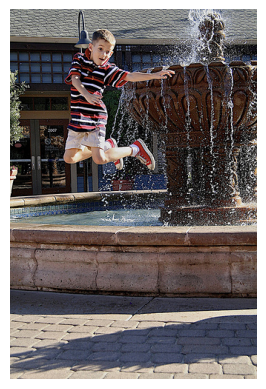

In [80]:
generate_caption('1100214449_d10861e633.jpg')

-------------------Actual-------------------
startseq black dog jumping to catch rope toy endseq
startseq black dog playing fetch with ball of rope endseq
startseq black dog pounces to get rope toy endseq
startseq black dog running after his rope toy endseq
startseq large black dog is playing in grassy yard endseq
-------------------Predicted-------------------
startseq black dog is running in the grass endseq


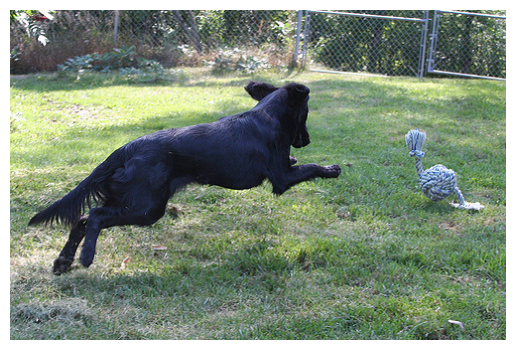

In [82]:
generate_caption('1107246521_d16a476380.jpg')

-------------------Actual-------------------
startseq kid rock climbing against the backdrop of green valley endseq
startseq woman in striped shirt climbs up mountain endseq
startseq young man climbs rocky hill endseq
startseq the person has striped shirt on and is holding on to rope on mountain endseq
startseq the person in the striped shirt is mountain climbing endseq
-------------------Predicted-------------------
startseq man is running on the water endseq


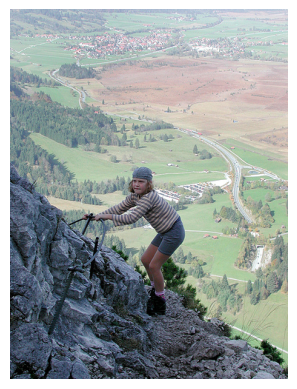

In [84]:
generate_caption('111497985_38e9f88856.jpg')

-------------------Actual-------------------
startseq bridge through high green plants man and woman on it endseq
startseq man and woman are crossing over rope bridge with greenery all over them endseq
startseq man and woman are walking across rope bridge endseq
startseq man and woman crossing suspension bridge in tropical setting endseq
startseq woman and man walking across wooden rope bridge with caution sign beside it endseq
-------------------Predicted-------------------
startseq man in red shirt is in the the water endseq


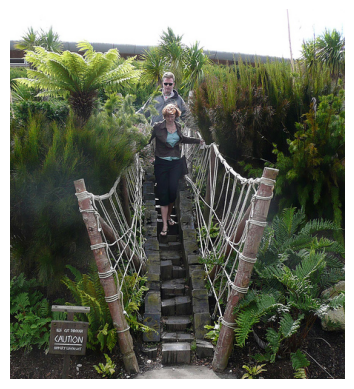

In [94]:
generate_caption('1141718391_24164bf1b1')